In [29]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kruskal
import numpy as np
import pandas as pd
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

In [3]:
# Step 1: Read the input file and calculate the MSE for each model
input_file = r"C:\Users\dezos\Documents\Fibres\FibreAnalysis\Step1_DataCreation\Step4_Evaluate\IOUResults_141.csv"  # Replace with the actual path to your input file

yolo_mse_list = []
detect_mse_list = []
sam_mse_list = []
samlang_mse_list = []


In [3]:
with open(input_file, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        ground_truth_count = float(row['Ground Truth count'])
        yolo_count = float(row['YOLO Count'])
        detect_count = float(row['Detect Count'])
        sam_count = float(row['SAM Count'])
        samlang_count = float(row['SAM Lang count'])

        yolo_mse = (yolo_count - ground_truth_count) ** 2
        detect_mse = (detect_count - ground_truth_count) ** 2
        sam_mse = (sam_count - ground_truth_count) ** 2
        samlang_mse = (samlang_count - ground_truth_count) ** 2

        yolo_mse_list.append(yolo_mse)
        detect_mse_list.append(detect_mse)
        sam_mse_list.append(sam_mse)
        samlang_mse_list.append(samlang_mse)



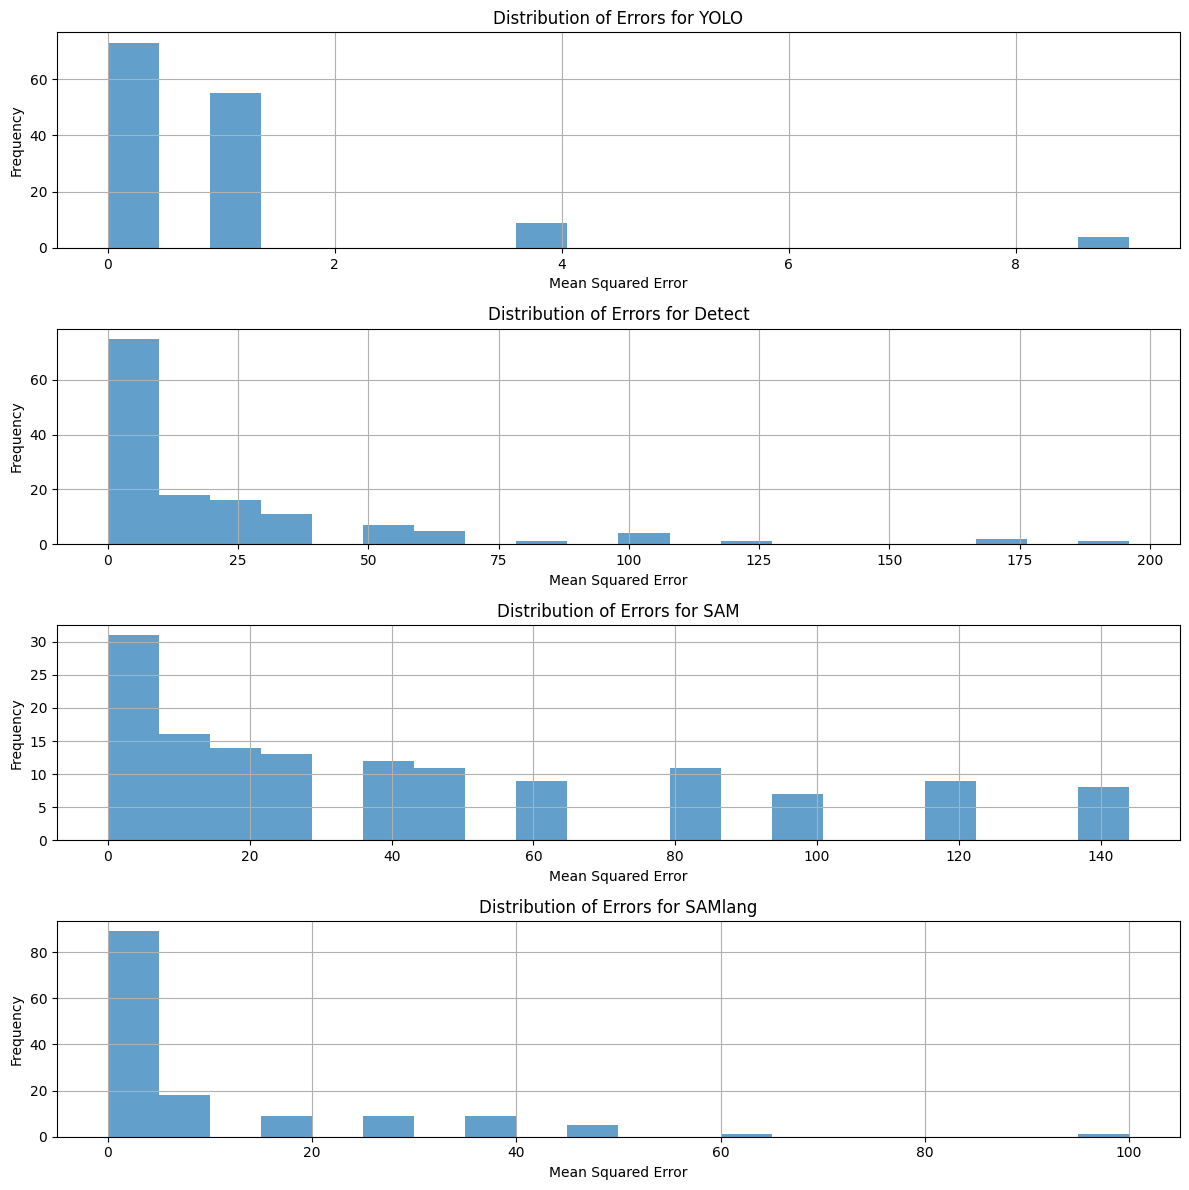

In [25]:
# Step 2: Plot the distribution of errors for each model
models = ['YOLO', 'Detect', 'SAM', 'SAMlang']
mse_lists = [yolo_mse_list, detect_mse_list, sam_mse_list, samlang_mse_list]

plt.figure(figsize=(12, 12))
for i, model in enumerate(models):
    plt.subplot(4, 1, i+1)
    plt.hist(mse_lists[i], bins=20, alpha=0.7)
    plt.xlabel('Mean Squared Error')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Errors for {model}')
    plt.grid(True)

plt.tight_layout()
plt.show()

mean 0.900709219858156 std dev 1.7023345027985954
[2.03739362e-01 2.09279581e-01 2.14358265e-01 2.18934938e-01
 2.22972537e-01 2.26437911e-01 2.29302276e-01 2.31541614e-01
 2.33137002e-01 2.34074887e-01 2.34347271e-01 2.33951826e-01
 2.32891931e-01 2.31176619e-01 2.28820450e-01 2.25843307e-01
 2.22270117e-01 2.18130499e-01 2.13458361e-01 2.08291435e-01
 2.02670769e-01 1.96640188e-01 1.90245726e-01 1.83535043e-01
 1.76556842e-01 1.69360282e-01 1.61994417e-01 1.54507650e-01
 1.46947225e-01 1.39358755e-01 1.31785790e-01 1.24269450e-01
 1.16848093e-01 1.09557054e-01 1.02428432e-01 9.54909396e-02
 8.87698060e-02 8.22867363e-02 7.60599204e-02 7.01040903e-02
 6.44306203e-02 5.90476651e-02 5.39603314e-02 4.91708766e-02
 4.46789291e-02 4.04817261e-02 3.65743614e-02 3.29500398e-02
 2.96003331e-02 2.65154325e-02 2.36843950e-02 2.10953793e-02
 1.87358691e-02 1.65928815e-02 1.46531583e-02 1.29033398e-02
 1.13301195e-02 9.92037997e-03 8.66131009e-03 7.54050323e-03
 6.54603821e-03 5.66654320e-03 4.89

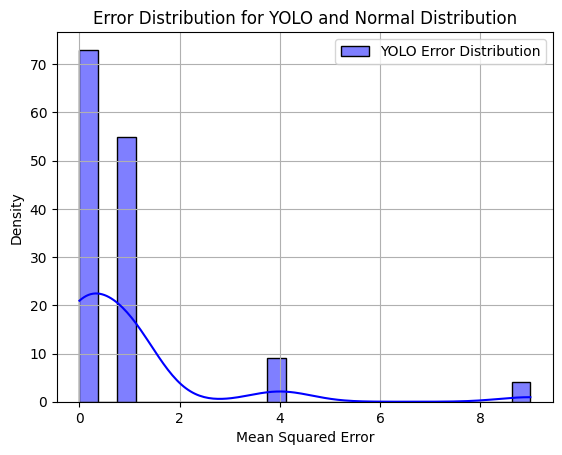

mean 22.390070921985817 std dev 33.05653293221351
[9.59470929e-03 9.97402593e-03 1.03312142e-02 1.06628780e-02
 1.09657847e-02 1.12369175e-02 1.14735250e-02 1.16731683e-02
 1.18337618e-02 1.19536106e-02 1.20314393e-02 1.20664152e-02
 1.20581629e-02 1.20067710e-02 1.19127907e-02 1.17772256e-02
 1.16015143e-02 1.13875047e-02 1.11374215e-02 1.08538282e-02
 1.05395831e-02 1.01977913e-02 9.83175415e-03 9.44491604e-03
 9.04081107e-03 8.62300993e-03 8.19506835e-03 7.76047805e-03
 7.32262122e-03 6.88472926e-03 6.44984627e-03 6.02079807e-03
 5.60016677e-03 5.19027131e-03 4.79315375e-03 4.41057145e-03
 4.04399457e-03 3.69460886e-03 3.36332295e-03 3.05077990e-03
 2.75737213e-03 2.48325940e-03 2.22838895e-03 1.99251731e-03
 1.77523321e-03 1.57598080e-03 1.39408301e-03 1.22876419e-03
 1.07917197e-03 9.44397809e-04 8.23495983e-04 7.15500926e-04
 6.19442667e-04 5.34360359e-04 4.59313860e-04 3.93393399e-04
 3.35727401e-04 2.85488559e-04 2.41898307e-04 2.04229818e-04
 1.71809698e-04 1.44018538e-04 1.20

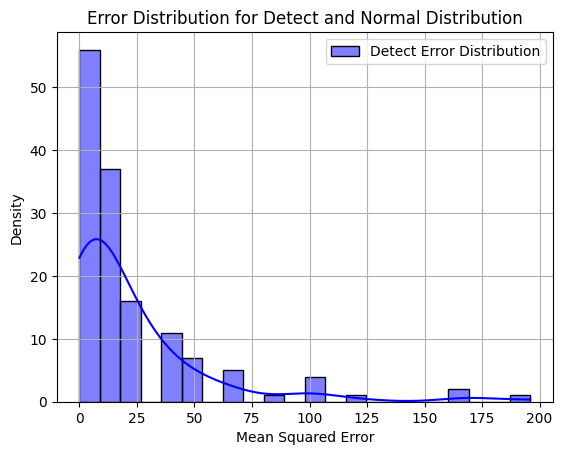

mean 43.39007092198582 std dev 43.46299853713433
[0.00557662 0.00576286 0.00594865 0.00613355 0.00631712 0.00649891
 0.00667844 0.00685525 0.00702886 0.0071988  0.0073646  0.00752579
 0.00768189 0.00783245 0.00797703 0.00811518 0.00824648 0.00837053
 0.00848693 0.00859531 0.00869534 0.00878669 0.00886905 0.00894217
 0.0090058  0.00905973 0.00910378 0.0091378  0.00916168 0.00917535
 0.00917875 0.00917187 0.00915474 0.00912741 0.00908998 0.00904256
 0.00898533 0.00891846 0.00884218 0.00875674 0.00866242 0.00855953
 0.00844839 0.00832935 0.00820281 0.00806914 0.00792877 0.00778211
 0.00762962 0.00747175 0.00730895 0.00714169 0.00697045 0.00679571
 0.00661792 0.00643757 0.00625513 0.00607106 0.0058858  0.00569982
 0.00551353 0.00532736 0.00514171 0.00495698 0.00477353 0.00459173
 0.00441191 0.00423439 0.00405946 0.0038874  0.00371846 0.00355289
 0.00339089 0.00323265 0.00307835 0.00292813 0.00278212 0.00264044
 0.00250317 0.00237037 0.00224211 0.00211842 0.0019993  0.00188478
 0.00177482 0

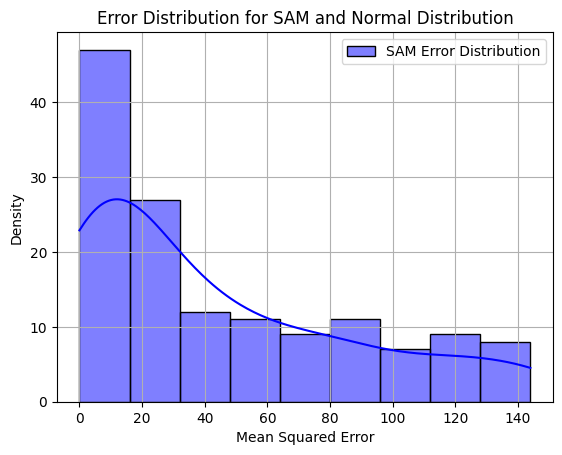

mean 10.127659574468085 std dev 15.35344859906433
[2.09035291e-02 2.17834625e-02 2.26023946e-02 2.33508253e-02
 2.40198482e-02 2.46013264e-02 2.50880571e-02 2.54739199e-02
 2.57540046e-02 2.59247155e-02 2.59838483e-02 2.59306371e-02
 2.57657710e-02 2.54913796e-02 2.51109868e-02 2.46294356e-02
 2.40527857e-02 2.33881864e-02 2.26437291e-02 2.18282841e-02
 2.09513247e-02 2.00227450e-02 1.90526763e-02 1.80513049e-02
 1.70286985e-02 1.59946430e-02 1.49584946e-02 1.39290491e-02
 1.29144314e-02 1.19220065e-02 1.09583119e-02 1.00290132e-02
 9.13888031e-03 8.29178473e-03 7.49071526e-03 6.73781063e-03
 6.03440638e-03 5.38109363e-03 4.77778701e-03 4.22379920e-03
 3.71791951e-03 3.25849414e-03 2.84350599e-03 2.47065208e-03
 2.13741709e-03 1.84114166e-03 1.57908451e-03 1.34847775e-03
 1.14657492e-03 9.70691732e-04 8.18239547e-04 6.86751857e-04
 5.73904276e-04 4.77528527e-04 3.95621078e-04 3.26347106e-04
 2.68040457e-04 2.19200316e-04 1.78485214e-04 1.44705005e-04
 1.16811366e-04 9.38873101e-05 7.51

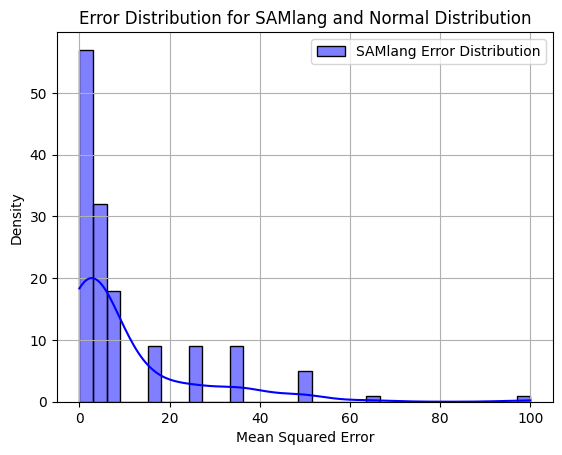

In [23]:
import numpy as np
import seaborn as sns
from scipy import stats
# Assuming you already have the lists yolo_mse_list, detect_mse_list, sam_mse_list, and samlang_mse_list from the previous code

models = ['YOLO', 'Detect', 'SAM', 'SAMlang']
mse_lists = [yolo_mse_list, detect_mse_list, sam_mse_list, samlang_mse_list]

for i, model in enumerate(models):
    mse_list = mse_lists[i]

    # Calculate mean and standard deviation for the data
    mean = np.mean(mse_list)
    std = np.std(mse_list)
    print('mean', mean, 'std dev', std)
    # Generate points along the x-axis for the normal distribution curve
    x = np.linspace(min(mse_list), max(mse_list), 100)
    # Calculate the probability density function (PDF) for the normal distribution
    y = stats.norm.pdf(x, mean, std)
    print(y)
    # Plot the error distribution using KDE
    plt.figure()
    sns.histplot(mse_list, kde=True, color='blue', label=f'{model} Error Distribution')
    # Plot the normal distribution curve
    #plt.plot(x, y, 'r', label='Normal Distribution')
    plt.xlabel('Mean Squared Error')
    plt.ylabel('Density')
    plt.title(f'Error Distribution for {model} and Normal Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()


In [58]:
import csv
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import scikit_posthocs as sp

C:\Users\dezos\AppData\Local\Temp\ipykernel_12072\1828703696.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


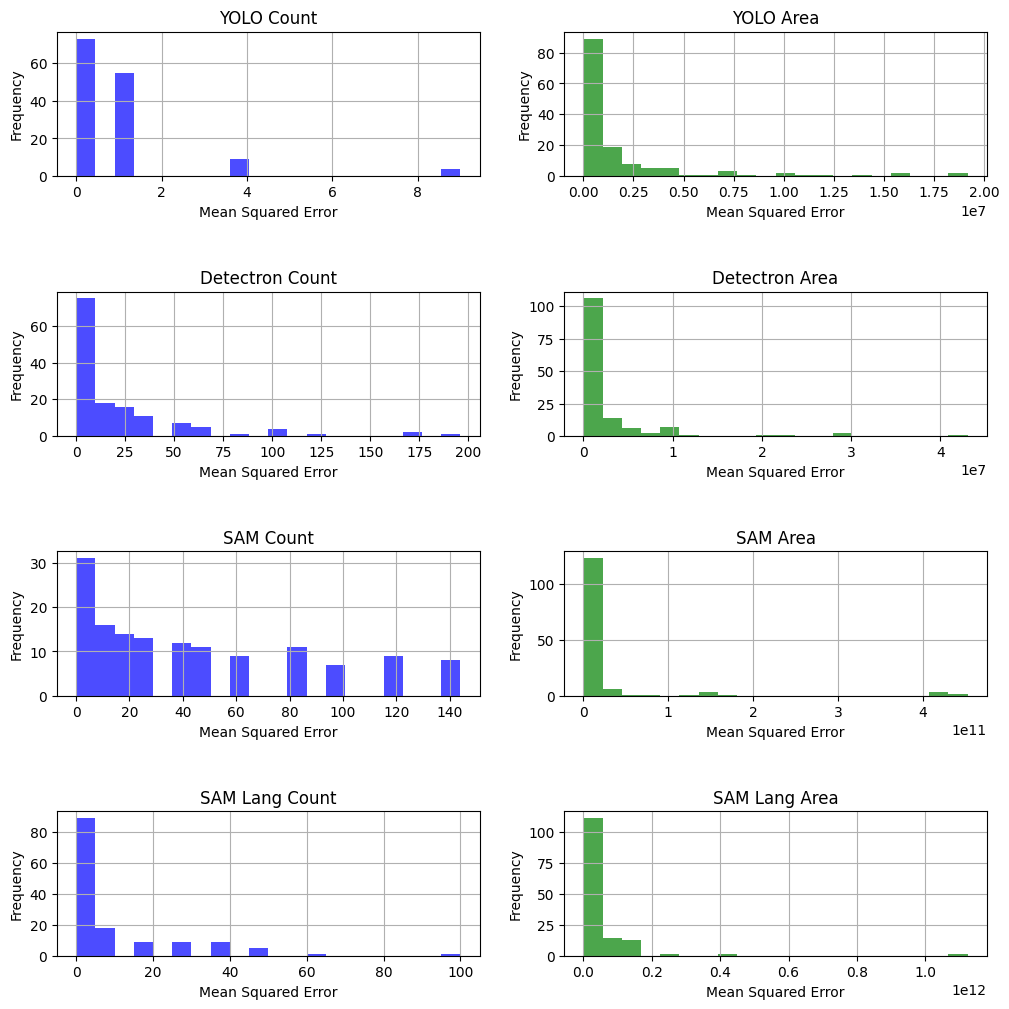

The most accurate model for count is: YOLO (Mean MSE for count: 0.900709219858156)
The most accurate model for area is: YOLO (Mean MSE for area: 1939530.4042553192)
{'YOLO': 0.900709219858156, 'Detectron': 22.390070921985817, 'SAM': 43.39007092198582, 'SAM Lang': 10.127659574468085}
{'YOLO': 1939530.4042553192, 'Detectron': 2655947.104609929, 'SAM': 24926419488.218086, 'SAM Lang': 35916268862.80496}


In [45]:


# Step 1: Read the input file and calculate the MSE for each model
#input_file = "your_input_file.csv"  # Replace with the actual path to your input file
input_file = r"C:\Users\dezos\Documents\Fibres\FibreAnalysis\Step1_DataCreation\Step4_Evaluate\IOUResults_141.csv"  # Replace with the actual path to your input file


models = ['YOLO', 'Detectron', 'SAM', 'SAM Lang']
mse_count_lists = {model: [] for model in models}  # Separate list for MSE of count
mse_area_lists = {model: [] for model in models}  # Separate list for MSE of area

with open(input_file, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        ground_truth_count = float(row['Ground Truth Count'])
        ground_truth_area = float(row['Ground Truth Area'])
        for model in models:
            model_count = float(row[f'{model} Count'])
            mse_count = (model_count - ground_truth_count) ** 2
            mse_count_lists[model].append(mse_count)

            model_area = float(row[f'{model} Area'])
            mse_area = (model_area - ground_truth_area) ** 2
            mse_area_lists[model].append(mse_area)

# Step 2: Find the mean MSE for each model for count and area separately
mean_mse_count = {model: sum(mse_count_lists[model]) / len(mse_count_lists[model]) for model in models}
mean_mse_area = {model: sum(mse_area_lists[model]) / len(mse_area_lists[model]) for model in models}

# Step 3: Identify the most accurate model for count and area separately
most_accurate_model_count = min(mean_mse_count, key=mean_mse_count.get)
most_accurate_model_area = min(mean_mse_area, key=mean_mse_area.get)

# Step 3: Create a 4x2 grid of subplots and plot the MSE for count and area for each model
fig = plt.figure(figsize=(12, 12))
gs = GridSpec(4, 2, height_ratios=[1, 1, 1, 1], hspace=.8)

for i, model in enumerate(models):
    ax_count = fig.add_subplot(gs[i, 0])

    mse_count_list = mse_count_lists[model]
    ax_count.hist(mse_count_list, bins=20, alpha=0.7, color='blue')

    ax_count.set_xlabel('Mean Squared Error')
    ax_count.set_ylabel('Frequency')
    ax_count.set_title(f'{model} Count')
    ax_count.grid(True)

    ax_area = fig.add_subplot(gs[i, 1])

    mse_area_list = mse_area_lists[model]
    ax_area.hist(mse_area_list, bins=20, alpha=0.7, color='green')

    ax_area.set_xlabel('Mean Squared Error')
    ax_area.set_ylabel('Frequency')
    ax_area.set_title(f'{model} Area')
    ax_area.grid(True)

plt.tight_layout()
plt.show()

# Optional: Print the most accurate models and their mean MSEs
print(f"The most accurate model for count is: {most_accurate_model_count} (Mean MSE for count: {mean_mse_count[most_accurate_model_count]})")
print(f"The most accurate model for area is: {most_accurate_model_area} (Mean MSE for area: {mean_mse_area[most_accurate_model_area]})")
print(mean_mse_count)
print(mean_mse_area)




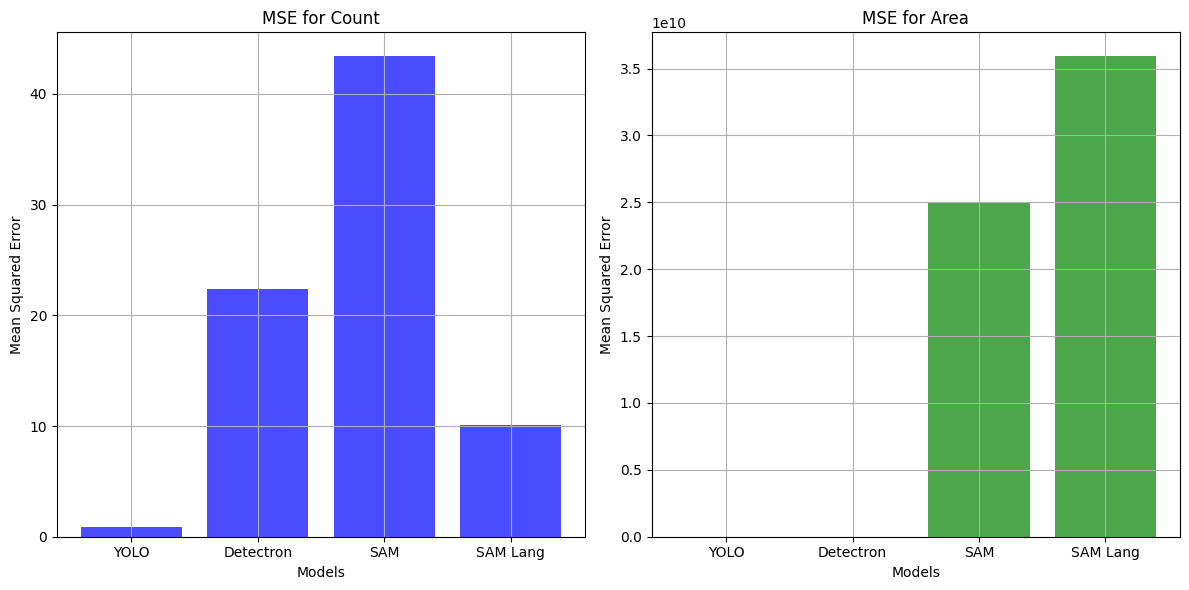

In [46]:
# Step 3: Plot the summaries for each model, one for area and one for count
fig, (ax_count, ax_area) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar plot for count MSE
ax_count.bar(models, list(mean_mse_count.values()), color='blue', alpha=0.7)
ax_count.set_xlabel('Models')
ax_count.set_ylabel('Mean Squared Error')
ax_count.set_title('MSE for Count')
ax_count.grid(True)

# Plot the bar plot for area MSE
ax_area.bar(models, list(mean_mse_area.values()), color='green', alpha=0.7)
ax_area.set_xlabel('Models')
ax_area.set_ylabel('Mean Squared Error')
ax_area.set_title('MSE for Area')
ax_area.grid(True)

plt.tight_layout()
plt.show()

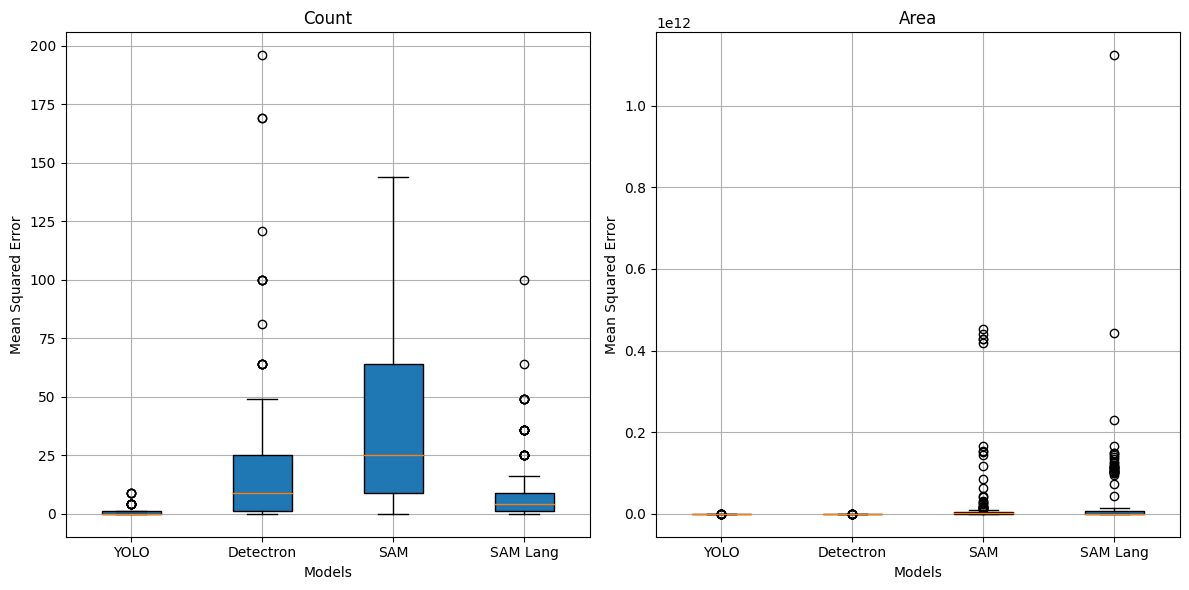

In [50]:
# Step 3: Plot the summaries for each model as box plots for count and area
fig, (ax_count, ax_area) = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for count MSE
ax_count.boxplot([mse_count_lists[model] for model in models], labels=models, patch_artist=True)
ax_count.set_xlabel('Models')
ax_count.set_ylabel('Mean Squared Error')
ax_count.set_title('Count')
ax_count.grid(True)

# Box plot for area MSE
#ax_area.boxplot([mse_area_lists[model] for model in models], labels=models,showfliers=False, patch_artist=True)
ax_area.boxplot([mse_area_lists[model] for model in models], labels=models, patch_artist=True)
ax_area.set_xlabel('Models')
ax_area.set_ylabel('Mean Squared Error')
ax_area.set_title('Area')
ax_area.grid(True)

plt.tight_layout()
plt.show()

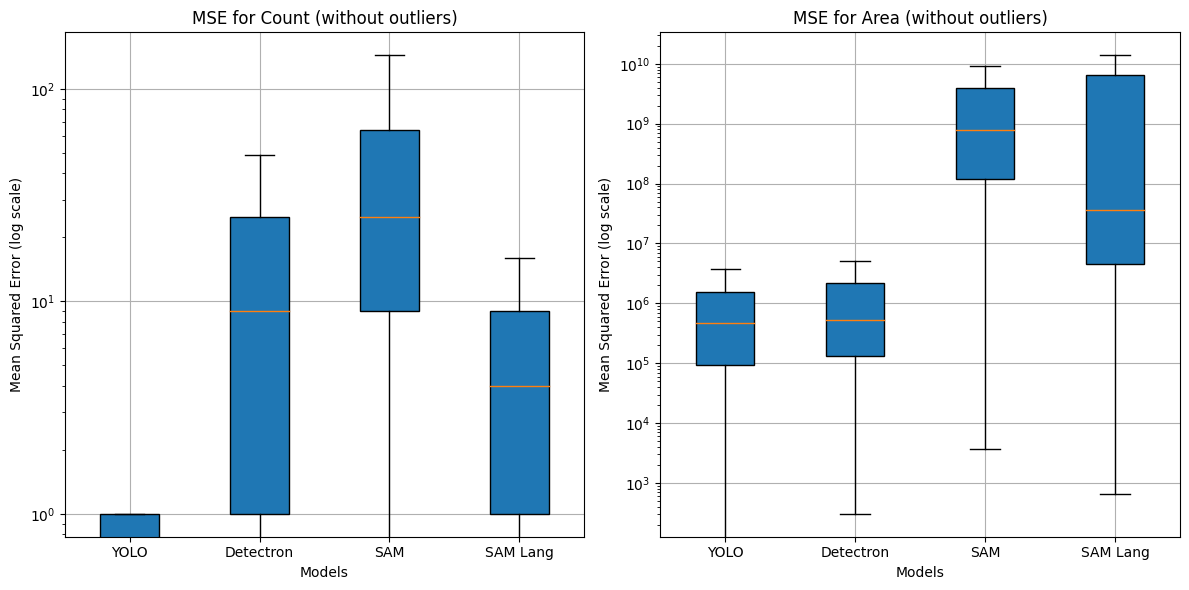

In [52]:
# Step 3: Plot the summaries for each model as box plots for count and area with log scale on y-axis
fig, (ax_count, ax_area) = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for count MSE on log scale
ax_count.boxplot([mse_count_lists[model] for model in models], labels=models, showfliers=False, patch_artist=True)
ax_count.set_xlabel('Models')
ax_count.set_ylabel('Mean Squared Error (log scale)')
ax_count.set_title('MSE for Count (without outliers)')
ax_count.grid(True)
ax_count.set_yscale('log')  # Set y-axis to log scale

# Box plot for area MSE on log scale
ax_area.boxplot([mse_area_lists[model] for model in models], labels=models, showfliers=False, patch_artist=True)
ax_area.set_xlabel('Models')
ax_area.set_ylabel('Mean Squared Error (log scale)')
ax_area.set_title('MSE for Area (without outliers)')
ax_area.grid(True)
ax_area.set_yscale('log')  # Set y-axis to log scale

plt.tight_layout()
plt.show()




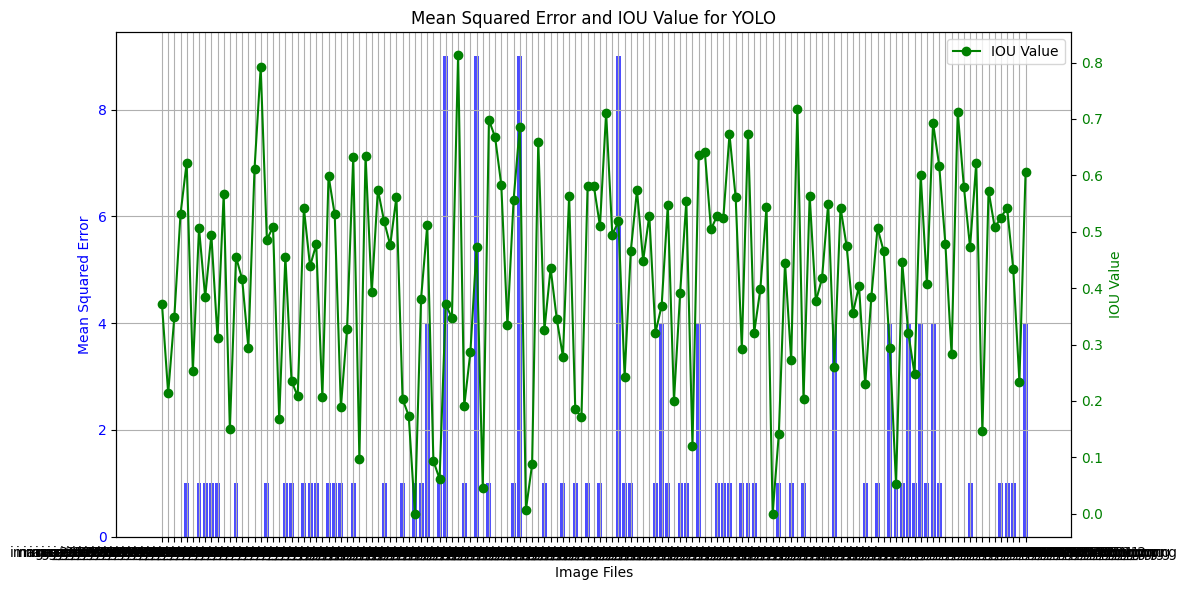

In [54]:
# import csv
# import matplotlib.pyplot as plt

# input_file = "path/to/your/input_file.csv"

# Load data from the input file
files = []
mse_values = []
iou_values = []

with open(input_file, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        files.append(row['Image'])

        # Calculate and store MSE for the Ground Truth Count and YOLO Count
        ground_truth_count = float(row['Ground Truth Count'])
        yolo_count = float(row['YOLO Count'])
        mse = (yolo_count - ground_truth_count) ** 2
        mse_values.append(mse)

        # Store IOU value for YOLO
        yolo_iou = float(row['YOLO_iou_value'])
        iou_values.append(yolo_iou)

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot MSE on the left y-axis as bar plot
ax1.bar(files, mse_values, color='blue', alpha=0.7)
ax1.set_xlabel('Image Files')
ax1.set_ylabel('Mean Squared Error', color='blue')
ax1.set_title('Mean Squared Error and IOU Value for YOLO')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second y-axis on the right for IOU values
ax2 = ax1.twinx()
ax2.plot(files, iou_values, color='green', marker='o', label='IOU Value')
ax2.set_ylabel('IOU Value', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [61]:
import csv
import pandas as pd
from scipy.stats import kruskal

# Load the data from the input file into a Pandas DataFrame
#input_file = "path/to/your/input_file.csv"
df = pd.read_csv(input_file)

# Extract the data for each model from the <model>_predIOU columns
models = ['YOLO', 'Detectron', 'SAM', 'SAMlang']
model_data = {model: df[f'{model}_predIOU'] for model in models}

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(*model_data.values())

# Print the results
print("Kruskal-Wallis Test Results:")
print("Statistic:", statistic)
print("P-value:", p_value)

print(len(models))

if len(models) >= 3:
    print(model_data)
    # Interpret the results
    if p_value < 0.05:
    # Perform Dunn's test for multiple comparisons
    
        results = sp.posthoc_dunn(model_data, p_adjust='bonferroni')

        # Print the results
        print("Dunn's Test Results:")
        print(results)

        # Identify significant differences between groups
        significant_differences = []
        for model1 in models:
            for model2 in models:
                if model1 != model2 and results.loc[model1, model2] < 0.05:
                    significant_differences.append((model1, model2))

        if len(significant_differences) > 0:
            print("Significant Differences:")
            for model1, model2 in significant_differences:
                print(f"{model1} vs. {model2}")
        else:
            print("No significant differences between groups.")


    else:
        print("The Kruskal-Wallis test fails to reject the null hypothesis.")
        print("There is no significant difference between the medians of the groups.")


Kruskal-Wallis Test Results:
Statistic: 209.9677986972438
P-value: 2.95898008318498e-45
4
{'YOLO': 0      0.407521
1      0.400996
2      0.558600
3      0.789942
4      0.651934
         ...   
136    0.729064
137    0.763155
138    0.606703
139    0.243182
140    0.777030
Name: YOLO_predIOU, Length: 141, dtype: float64, 'Detectron': 0      0.458459
1      0.914175
2      0.775266
3      0.800000
4      0.405172
         ...   
136    0.888484
137    0.810720
138    0.711054
139    0.164238
140    0.809286
Name: Detectron_predIOU, Length: 141, dtype: float64, 'SAM': 0      0.029541
1      0.792203
2      0.004508
3      0.004162
4      0.000000
         ...   
136    0.033192
137    0.945188
138    0.015577
139    0.000367
140    0.047070
Name: SAM_predIOU, Length: 141, dtype: float64, 'SAMlang': 0      0.457386
1      0.857038
2      0.019996
3      0.017411
4      0.000822
         ...   
136    0.010225
137    0.921439
138    0.003804
139    0.000694
140    0.003762
Name: SAMlang_p

TypeError: cannot unpack non-iterable NoneType object

In [23]:
import pandas as pd
import scikit_posthocs as sp
from itertools import combinations

# Load the data from the input file into a Pandas DataFrame
#input_file = "path/to/your/input_file.csv"
df = pd.read_csv(input_file)

# Extract the data for each model from the <model>_predIOU columns
models = ['YOLO', 'Detectron', 'SAM', 'SAMlang']
model_data = {model: df[f'{model}_predIOU'] for model in models}
#print('model data', list(model_data.values()))
# Check if there is variation in the data for each model
variances = {model: np.var(data) for model, data in model_data.items()}
print(type(model_data))

# Check if any model has zero variance (constant data)
if any(variance == 0 for variance in variances.values()):
    print("Dunn's test is not applicable as there is no variation in the data.")
else:
    # Perform the Kruskal-Wallis test
    _, p_value = kruskal(*model_data.values())

    # Check if the Kruskal-Wallis test is significant (p_value < 0.05)
    print('p value', p_value)
    if p_value < 0.05:
        # Perform Dunn's test for multiple comparisons
        #print(model_data)
        dunn_results = sp.posthoc_dunn(list(model_data.values()), p_adjust='bonferroni')

        # Assign model names as row and column labels for the Dunn's test results DataFrame
        dunn_results.index = variances.keys()
        dunn_results.columns = variances.keys()

        # Print the results
        print("Dunn's Test Results:")
        print(dunn_results)

        # Identify significant differences between groups
        significant_differences = []
        for model1, model2 in combinations(models, 2):
           # print(dunn_results)
            if dunn_results.loc[model1, model2] < 0.05:
                significant_differences.append((model1, model2))

        if len(significant_differences) > 0:
            print("Significant Differences:")
            for model1, model2 in significant_differences:
                print(f"{model1} vs. {model2}")
        else:
            print("No significant differences between groups.")
    else:
        print("The Kruskal-Wallis test did not find significant differences among the groups.")

<class 'dict'>
p value 2.95898008318498e-45
Dunn's Test Results:
                   YOLO     Detectron           SAM       SAMlang
YOLO       1.000000e+00  1.604948e-04  8.855167e-21  2.752130e-05
Detectron  1.604948e-04  1.000000e+00  3.701901e-42  9.604932e-18
SAM        8.855167e-21  3.701901e-42  1.000000e+00  4.367640e-06
SAMlang    2.752130e-05  9.604932e-18  4.367640e-06  1.000000e+00
Significant Differences:
YOLO vs. Detectron
YOLO vs. SAM
YOLO vs. SAMlang
Detectron vs. SAM
Detectron vs. SAMlang
SAM vs. SAMlang


<class 'dict'>
p value 2.95898008318498e-45
Dunn's Test Results:
                   YOLO     Detectron           SAM      SAM Lang
YOLO       1.000000e+00  1.604948e-04  8.855167e-21  2.752130e-05
Detectron  1.604948e-04  1.000000e+00  3.701901e-42  9.604932e-18
SAM        8.855167e-21  3.701901e-42  1.000000e+00  4.367640e-06
SAM Lang   2.752130e-05  9.604932e-18  4.367640e-06  1.000000e+00


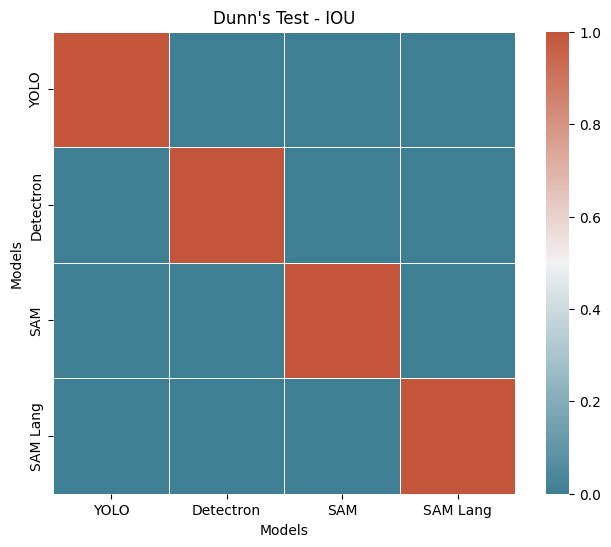

Significant Differences:
YOLO vs. Detectron
YOLO vs. SAM
YOLO vs. SAM Lang
Detectron vs. SAM
Detectron vs. SAM Lang
SAM vs. SAM Lang


In [38]:
import pandas as pd
import scikit_posthocs as sp
from itertools import combinations

# Load the data from the input file into a Pandas DataFrame
#input_file = "path/to/your/input_file.csv"
df = pd.read_csv(input_file)

# Extract the data for each model from the <model>_predIOU columns
models = [ 'YOLO', 'Detectron', 'SAM', 'SAM Lang' ]
model_data = {model: df[f'{model}_predIOU'] for model in models}
#print('model data', list(model_data.values()))
# Check if there is variation in the data for each model
variances = {model: np.var(data) for model, data in model_data.items()}
print(type(model_data))

# Check if any model has zero variance (constant data)
if any(variance == 0 for variance in variances.values()):
    print("Dunn's test is not applicable as there is no variation in the data.")
else:
    # Perform the Kruskal-Wallis test
    _, p_value = kruskal(*model_data.values())

    # Check if the Kruskal-Wallis test is significant (p_value < 0.05)
    print('p value', p_value)
    if p_value < 0.05:
        # Perform Dunn's test for multiple comparisons
        #print(model_data)
        dunn_results = sp.posthoc_dunn(list(model_data.values()), p_adjust='bonferroni')

        # Assign model names as row and column labels for the Dunn's test results DataFrame
        dunn_results.index = variances.keys()
        dunn_results.columns = variances.keys()

        # Print the results
        print("Dunn's Test Results:")
        print(dunn_results)

       # Create a heatmap to visualize the Dunn's test results
        plt.figure(figsize=(8, 6))
        custom_palette = sns.diverging_palette(220, 20, as_cmap=True)  # Custom color palette
        sns.heatmap(dunn_results, annot=False, cmap=custom_palette, linewidths=0.5, square=True)
        
        plt.title("Dunn's Test - IOU")
        plt.xlabel("Models")
        plt.ylabel("Models")
        plt.show()


        # Identify significant differences between groups
        significant_differences = []
        for model1, model2 in combinations(models, 2):
           # print(dunn_results)
            if dunn_results.loc[model1, model2] < 0.05:
                significant_differences.append((model1, model2))

        if len(significant_differences) > 0:
            print("Significant Differences:")
            for model1, model2 in significant_differences:
                print(f"{model1} vs. {model2}")
        else:
            print("No significant differences between groups.")
    else:
        print("The Kruskal-Wallis test did not find significant differences among the groups.")

<class 'dict'>
p value 2.987305727001567e-43
Dunn's Test Results:
              Ground Truth          YOLO     Detectron           SAM  \
Ground Truth  1.000000e+00  1.000000e+00  1.919634e-10  5.469623e-26   
YOLO          1.000000e+00  1.000000e+00  1.041116e-10  2.081535e-26   
Detectron     1.919634e-10  1.041116e-10  1.000000e+00  5.223757e-04   
SAM           5.469623e-26  2.081535e-26  5.223757e-04  1.000000e+00   
SAM Lang      1.000000e+00  1.000000e+00  2.267908e-11  1.910969e-27   

                  SAM Lang  
Ground Truth  1.000000e+00  
YOLO          1.000000e+00  
Detectron     2.267908e-11  
SAM           1.910969e-27  
SAM Lang      1.000000e+00  


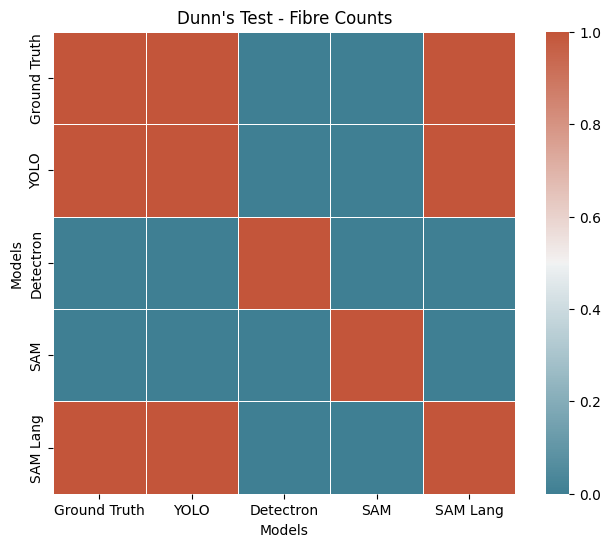

Significant Differences:
Ground Truth vs. Detectron
Ground Truth vs. SAM
YOLO vs. Detectron
YOLO vs. SAM
Detectron vs. SAM
Detectron vs. SAM Lang
SAM vs. SAM Lang


In [34]:
import pandas as pd
import scikit_posthocs as sp
from itertools import combinations

# Load the data from the input file into a Pandas DataFrame
#input_file = "path/to/your/input_file.csv"
df = pd.read_csv(input_file)

# Extract the data for each model from the <model>_predIOU columns
models = ['Ground Truth', 'YOLO', 'Detectron', 'SAM', 'SAM Lang' ]
model_data = {model: df[f'{model} Count'] for model in models}
#print('model data', list(model_data.values()))
# Check if there is variation in the data for each model
variances = {model: np.var(data) for model, data in model_data.items()}
print(type(model_data))

# Check if any model has zero variance (constant data)
if any(variance == 0 for variance in variances.values()):
    print("Dunn's test is not applicable as there is no variation in the data.")
else:
    # Perform the Kruskal-Wallis test
    _, p_value = kruskal(*model_data.values())

    # Check if the Kruskal-Wallis test is significant (p_value < 0.05)
    print('p value', p_value)
    if p_value < 0.05:
        # Perform Dunn's test for multiple comparisons
        #print(model_data)
        dunn_results = sp.posthoc_dunn(list(model_data.values()), p_adjust='bonferroni')

        # Assign model names as row and column labels for the Dunn's test results DataFrame
        dunn_results.index = variances.keys()
        dunn_results.columns = variances.keys()

        # Print the results
        print("Dunn's Test Results:")
        print(dunn_results)

       # Create a heatmap to visualize the Dunn's test results
        plt.figure(figsize=(8, 6))
        custom_palette = sns.diverging_palette(220, 20, as_cmap=True)  # Custom color palette
        sns.heatmap(dunn_results, annot=False, cmap=custom_palette, linewidths=0.5, square=True)
        
        plt.title("Dunn's Test - Fibre Counts")
        plt.xlabel("Models")
        plt.ylabel("Models")
        plt.show()


        # Identify significant differences between groups
        significant_differences = []
        for model1, model2 in combinations(models, 2):
           # print(dunn_results)
            if dunn_results.loc[model1, model2] < 0.05:
                significant_differences.append((model1, model2))

        if len(significant_differences) > 0:
            print("Significant Differences:")
            for model1, model2 in significant_differences:
                print(f"{model1} vs. {model2}")
        else:
            print("No significant differences between groups.")
    else:
        print("The Kruskal-Wallis test did not find significant differences among the groups.")

<class 'dict'>
p value 8.408487799559915e-59
Dunn's Test Results:
              Ground Truth          YOLO     Detectron           SAM  \
Ground Truth  1.000000e+00  1.000000e+00  1.000000e+00  7.351599e-38   
YOLO          1.000000e+00  1.000000e+00  1.000000e+00  6.089303e-34   
Detectron     1.000000e+00  1.000000e+00  1.000000e+00  3.570126e-37   
SAM           7.351599e-38  6.089303e-34  3.570126e-37  1.000000e+00   
SAM Lang      1.615895e-14  3.845624e-12  4.271322e-14  3.954317e-06   

                  SAM Lang  
Ground Truth  1.615895e-14  
YOLO          3.845624e-12  
Detectron     4.271322e-14  
SAM           3.954317e-06  
SAM Lang      1.000000e+00  


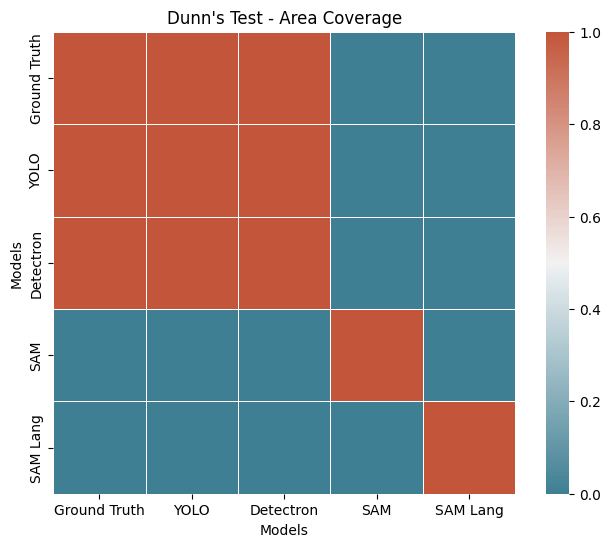

Significant Differences:
Ground Truth vs. SAM
Ground Truth vs. SAM Lang
YOLO vs. SAM
YOLO vs. SAM Lang
Detectron vs. SAM
Detectron vs. SAM Lang
SAM vs. SAM Lang


In [35]:
import pandas as pd
import scikit_posthocs as sp
from itertools import combinations

# Load the data from the input file into a Pandas DataFrame
#input_file = "path/to/your/input_file.csv"
df = pd.read_csv(input_file)

# Extract the data for each model from the <model>_predIOU columns
models = ['Ground Truth', 'YOLO', 'Detectron', 'SAM', 'SAM Lang' ]
model_data = {model: df[f'{model} Area'] for model in models}
#print('model data', list(model_data.values()))
# Check if there is variation in the data for each model
variances = {model: np.var(data) for model, data in model_data.items()}
print(type(model_data))

# Check if any model has zero variance (constant data)
if any(variance == 0 for variance in variances.values()):
    print("Dunn's test is not applicable as there is no variation in the data.")
else:
    # Perform the Kruskal-Wallis test
    _, p_value = kruskal(*model_data.values())

    # Check if the Kruskal-Wallis test is significant (p_value < 0.05)
    print('p value', p_value)
    if p_value < 0.05:
        # Perform Dunn's test for multiple comparisons
        #print(model_data)
        dunn_results = sp.posthoc_dunn(list(model_data.values()), p_adjust='bonferroni')

        # Assign model names as row and column labels for the Dunn's test results DataFrame
        dunn_results.index = variances.keys()
        dunn_results.columns = variances.keys()

        # Print the results
        print("Dunn's Test Results:")
        print(dunn_results)

       # Create a heatmap to visualize the Dunn's test results
        plt.figure(figsize=(8, 6))
        custom_palette = sns.diverging_palette(220, 20, as_cmap=True)  # Custom color palette
        sns.heatmap(dunn_results, annot=False, cmap=custom_palette, linewidths=0.5, square=True)
        
        plt.title("Dunn's Test - Area Coverage")
        plt.xlabel("Models")
        plt.ylabel("Models")
        plt.show()


        # Identify significant differences between groups
        significant_differences = []
        for model1, model2 in combinations(models, 2):
           # print(dunn_results)
            if dunn_results.loc[model1, model2] < 0.05:
                significant_differences.append((model1, model2))

        if len(significant_differences) > 0:
            print("Significant Differences:")
            for model1, model2 in significant_differences:
                print(f"{model1} vs. {model2}")
        else:
            print("No significant differences between groups.")
    else:
        print("The Kruskal-Wallis test did not find significant differences among the groups.")